# Implementing a Multilayer Perceptron from Scratch

In [1]:
%matplotlib inline
import d2l
from mxnet import nd
from mxnet.gluon import loss as gloss

## Load the Fashion-MNIST data set

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

## Initialize Model Parameters

In [3]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nd.random.normal(scale=0.01, shape=(num_inputs, num_hiddens))
b1 = nd.zeros(num_hiddens)
W2 = nd.random.normal(scale=0.01, shape=(num_hiddens, num_outputs))
b2 = nd.zeros(num_outputs)
params = [W1, b1, W2, b2]

for param in params:
    param.attach_grad()

## Activation Function

In [4]:
def relu(X):
    return nd.maximum(X, 0)

## The model

In [5]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(nd.dot(X, W1) + b1)
    return nd.dot(H, W2) + b2

## The Loss Function

In [6]:
loss = gloss.SoftmaxCrossEntropyLoss()

## Training

In [7]:
num_epochs, lr = 10, 0.5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size,
             params, lr)

epoch 1, loss 0.7868, train acc 0.708, test acc 0.822
epoch 2, loss 0.4831, train acc 0.820, test acc 0.853
epoch 3, loss 0.4295, train acc 0.842, test acc 0.859
epoch 4, loss 0.3930, train acc 0.856, test acc 0.865
epoch 5, loss 0.3663, train acc 0.866, test acc 0.869
epoch 6, loss 0.3520, train acc 0.870, test acc 0.871
epoch 7, loss 0.3368, train acc 0.876, test acc 0.870
epoch 8, loss 0.3236, train acc 0.880, test acc 0.878
epoch 9, loss 0.3129, train acc 0.886, test acc 0.883
epoch 10, loss 0.3067, train acc 0.886, test acc 0.882


## Evaluation

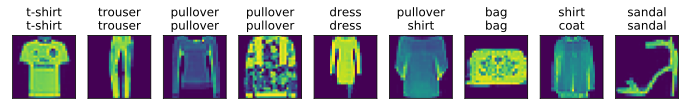

In [8]:
for X, y in test_iter:
    break

true_labels = d2l.get_fashion_mnist_labels(y.asnumpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1).asnumpy())
titles = [truelabel + '\n' + predlabel for truelabel, predlabel in zip(true_labels, pred_labels)]

d2l.show_fashion_mnist(X[0:9], titles[0:9])